# Final Graphs for Report

## Imports and Test-Wide General Use

In [1]:
import monke_features as mf
import monke_io as mio
import monke_classify as mc
import dim_reduction as dr

import os.path as path
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
# KOI
names_koi = ["koi_apr11", "koi_apr17", "koi_apr25", "koi_apr25_3", "koi_apr25_4", "koi_apr25_5", "koi_apr25_6"]

pose_data_koi = mio.read_poses(names_koi)
tremors_raw = mio.read_tremors_multi(names_koi)
labels_koi = {}

for name in tremors_raw:
    labels_koi[name] = mf.generate_labelled_frames(pose_data_koi[name], tremors_raw[name])

# BOBA
names_boba = ["boba_apr11", "boba_apr21", "boba_apr21_2", "boba_apr25", "boba_apr25_2"]

pose_data_boba = mio.read_poses(names_boba)
tremors_raw = mio.read_tremors_multi(names_boba)
labels_boba = {}

for name in tremors_raw:
    labels_boba[name] = mf.generate_labelled_frames(pose_data_boba[name], tremors_raw[name])

# BANDUNG
names_bandung = ["bandung_mar27", "bandung_mar27_2", "bandung_mar27_3", "bandung_may19_2"]

pose_data_bandung = mio.read_poses(names_bandung)
tremors_raw = mio.read_tremors_multi(names_bandung)
labels_bandung = {}

for name in tremors_raw:
    labels_bandung[name] = mf.generate_labelled_frames(pose_data_bandung[name], tremors_raw[name])

# HORLICKS
names_horlicks = ["horlicks_apr12", "horlicks_may2", "horlicks_jun16"]

pose_data_horlicks = mio.read_poses(names_horlicks)
tremors_raw = mio.read_tremors_multi(names_horlicks)
labels_horlicks = {}

for name in tremors_raw:
    labels_horlicks[name] = mf.generate_labelled_frames(pose_data_horlicks[name], tremors_raw[name])
    
# BRIYANI
names_briyani = ["briyani_apr12", "briyani_may19", "briyani_jun16"]

pose_data_briyani = mio.read_poses(names_briyani)
tremors_raw = mio.read_tremors_multi(names_briyani)
labels_briyani = {}

for name in tremors_raw:
    labels_briyani[name] = mf.generate_labelled_frames(pose_data_briyani[name], tremors_raw[name])
    
# TUTU KUEH
names_tutukueh = ["tutukueh_apr21", "tutukueh_may2", "tutukueh_jun15"]

pose_data_tutukueh = mio.read_poses(names_tutukueh)
tremors_raw = mio.read_tremors_multi(names_tutukueh)
labels_tutukueh = {}

for name in tremors_raw:
    labels_tutukueh[name] = mf.generate_labelled_frames(pose_data_tutukueh[name], tremors_raw[name])

# ALL
names_all = {"koi":names_koi, "boba":names_boba, "bandung":names_bandung, 
             "horlicks":names_horlicks, "briyani":names_briyani, "tutukueh":names_tutukueh}
pose_data_all = {"koi":pose_data_koi, "boba":pose_data_boba, "bandung":pose_data_bandung, 
             "horlicks":pose_data_horlicks, "briyani":pose_data_briyani, "tutukueh":pose_data_tutukueh}
labels_all = {"koi":labels_koi, "boba":labels_boba, "bandung":labels_bandung, 
             "horlicks":labels_horlicks, "briyani":labels_briyani, "tutukueh":labels_tutukueh}

In [3]:
cd = Path(path.abspath(""))

In [4]:
def merge_data(data, labels, names):
    data_merged = np.concatenate([data[name] for name in names])
    labels_merged = np.concatenate([labels[name] for name in names])
    return data_merged, labels_merged

## UMAP Graph

In [48]:
ws = 10
t = 0.1

process = lambda x : mf.changes_in_changes(mf.vel(x), window_size=ws, threshold=t)
pose_boba_apr11 = mio.read_pose("boba_apr11")
data_boba_apr11 = process(pose_boba_apr11)
tremors_boba_apr11 = mio.read_tremors("boba_apr11")
labels_boba_apr11 = mf.generate_labelled_frames(data_boba_apr11, tremors_boba_apr11)

In [49]:
reduced, reducer = dr.umap_reduce(data_boba_apr11)

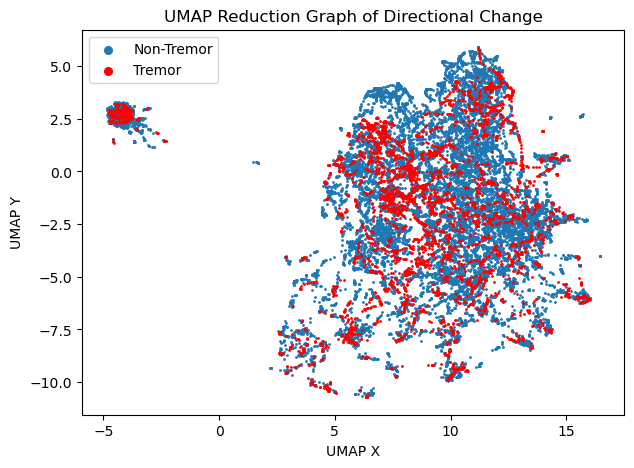

In [50]:
labels = np.array(labels_boba_apr11)
normal_points = reduced[labels == 0]
tremor_points = reduced[labels == 1]

plt.scatter(normal_points[:, 0], normal_points[:, 1], c="tab:blue", s=1, label="Non-Tremor")
plt.scatter(tremor_points[:, 0], tremor_points[:, 1], c="red", s=1, label="Tremor")
plt.plot([], [], c="black", label="Region of Separation")

plt.xlabel("UMAP X")
plt.ylabel("UMAP Y")
plt.title("UMAP Reduction Graph of Directional Change")
lgnd = plt.legend()
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]

plt.gcf().set_size_inches((7, 5))
# plt.xlim((-1.8, 15.5))
# plt.ylim((-3, 13))

plt.savefig(path.join(cd, "final_report_graphs", f"umap_{ws}_{t}.png"), dpi=300)

plt.show()

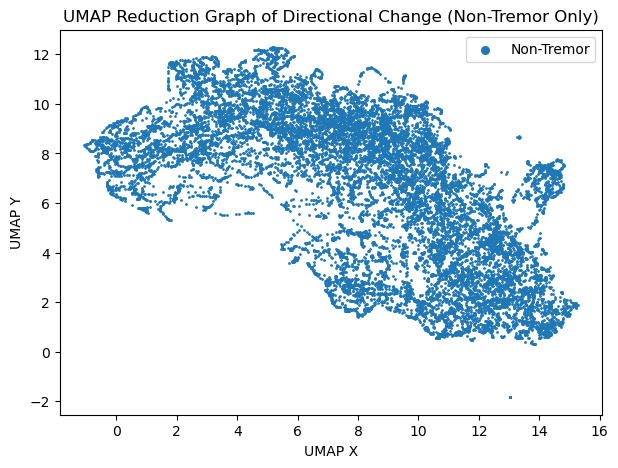

In [61]:
plt.scatter(normal_points[:, 0], normal_points[:, 1], c="tab:blue", s=1, label="Non-Tremor")

plt.xlabel("UMAP X")
plt.ylabel("UMAP Y")
plt.title("UMAP Reduction Graph of Directional Change (Non-Tremor Only)")

lgnd = plt.legend()
lgnd.legendHandles[0]._sizes = [30]

plt.gcf().set_size_inches((7, 5))
plt.xlim((-1.8, 15.5))
plt.ylim((-3, 13))

plt.savefig(path.join(cd, "final_report_graphs", "umap_normal.png"), dpi=300)

plt.show()

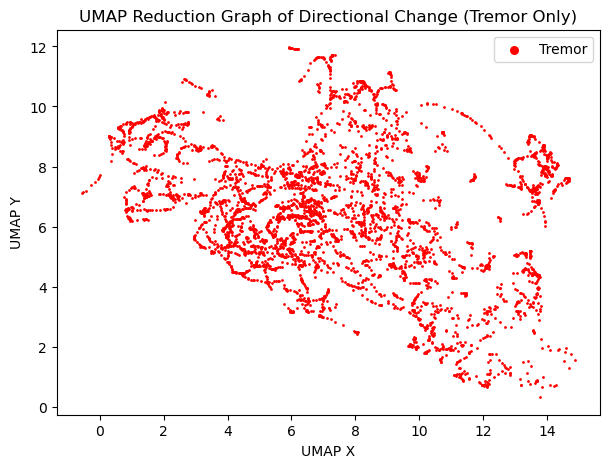

In [62]:
plt.scatter(tremor_points[:, 0], tremor_points[:, 1], c="red", s=1, label="Tremor")

plt.xlabel("UMAP X")
plt.ylabel("UMAP Y")
plt.title("UMAP Reduction Graph of Directional Change (Tremor Only)")

lgnd = plt.legend()
lgnd.legendHandles[0]._sizes = [30]

plt.gcf().set_size_inches((7, 5))
# plt.xlim((-1.8, 15.5))
# plt.ylim((-3, 13))

plt.savefig(path.join(cd, "final_report_graphs", "umap_tremor.png"), dpi=300)

plt.show()

## Window Size Graph

In [76]:
t = 0.1
window_sizes = list(range(1,21))
mccs = []

for ws in window_sizes:
    process = lambda x : mf.changes_in_changes(mf.vel(x), ws, t)
    pro_data, pro_labels = mc.process_data(pose_data_koi, labels_koi, process)
    training_data, testing_data, training_labels, testing_labels = mc.prep_train_test_data(pro_data, pro_labels, names_koi)
    
    clf = RandomForestClassifier(class_weight="balanced")
    clf.fit(training_data, training_labels)

    testing_data_merged = np.concatenate([testing_data[name] for name in testing_data])
    testing_labels_merged = np.concatenate([testing_labels[name] for name in testing_labels])

    mccs.append(mc.test_classify(clf, testing_data_merged, testing_labels_merged)["mcc"])

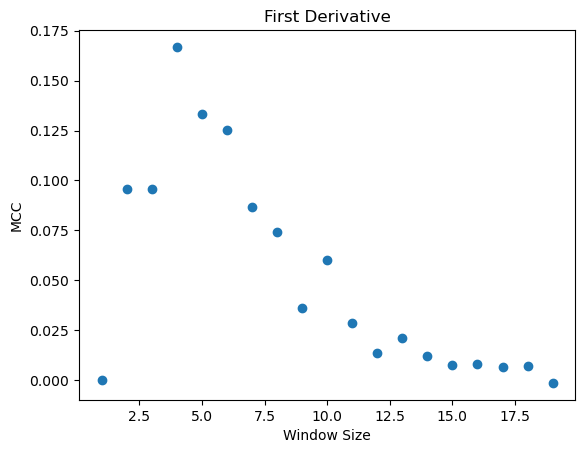

In [77]:
plt.scatter(window_sizes[:-1], np.diff(mccs, 1))
plt.title("First Derivative")
plt.xlabel("Window Size")
plt.ylabel("MCC")
plt.show()

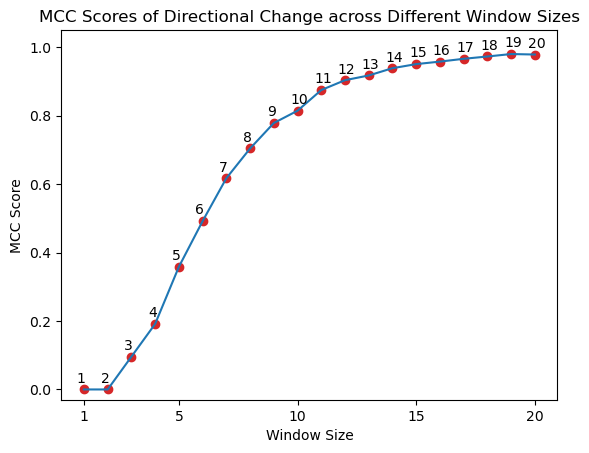

In [86]:
plt.plot(window_sizes, mccs)
plt.scatter(window_sizes, mccs, c="tab:red")
plt.title("MCC Scores of Directional Change across Different Window Sizes")

for w in window_sizes:
    plt.text(w-0.3, mccs[w-1]+0.02, str(w))

plt.xlabel("Window Size")
plt.ylabel("MCC Score")
plt.xticks([1] + [i for i in window_sizes if i%5==0])
plt.ylim(-0.03, 1.05)
# plt.gcf().set_size_inches((7, 7))
plt.savefig(path.join(cd, "final_report_graphs", "window_size.png"), dpi=300)
plt.show()

In [ ]:
thresholds = [0.01*i for i in range()]
window_sizes = list(range(1,21))
mccs = []

for ws in window_sizes:
    process = lambda x : mf.changes_in_changes(mf.vel(x), ws, t)
    pro_data, pro_labels = mc.process_data(pose_data_koi, labels_koi, process)
    training_data, testing_data, training_labels, testing_labels = mc.prep_train_test_data(pro_data, pro_labels, names_koi)
    
    clf = RandomForestClassifier(class_weight="balanced")
    clf.fit(training_data, training_labels)

    testing_data_merged = np.concatenate([testing_data[name] for name in testing_data])
    testing_labels_merged = np.concatenate([testing_labels[name] for name in testing_labels])

    mccs.append(mc.test_classify(clf, testing_data_merged, testing_labels_merged)["mcc"])

## Noise Reduction Matrix (Final)

In [83]:
thresholds = [0.25, 0.3]

results_final = {}

for t in thresholds:
    process = lambda x : mf.changes_in_changes(mf.vel(x), 5, t)
    pro_data, pro_labels = mc.process_data(pose_data_koi, labels_koi, process)
    training_data, testing_data, training_labels, testing_labels = mc.prep_train_test_data(pro_data, pro_labels, names_koi)
    clf = RandomForestClassifier(class_weight="balanced")
    clf.fit(training_data, training_labels)

    testing_data_merged = np.concatenate([testing_data[name] for name in testing_data])
    testing_labels_merged = np.concatenate([testing_labels[name] for name in testing_labels])

    results_final[t] = mc.test_classify(clf, testing_data_merged, testing_labels_merged)

In [86]:
for t in results_final:
    print(f"{t}: {results_final[t]['mcc']}")

0.25: 0.342858114442283
0.3: 0.32913028335029876


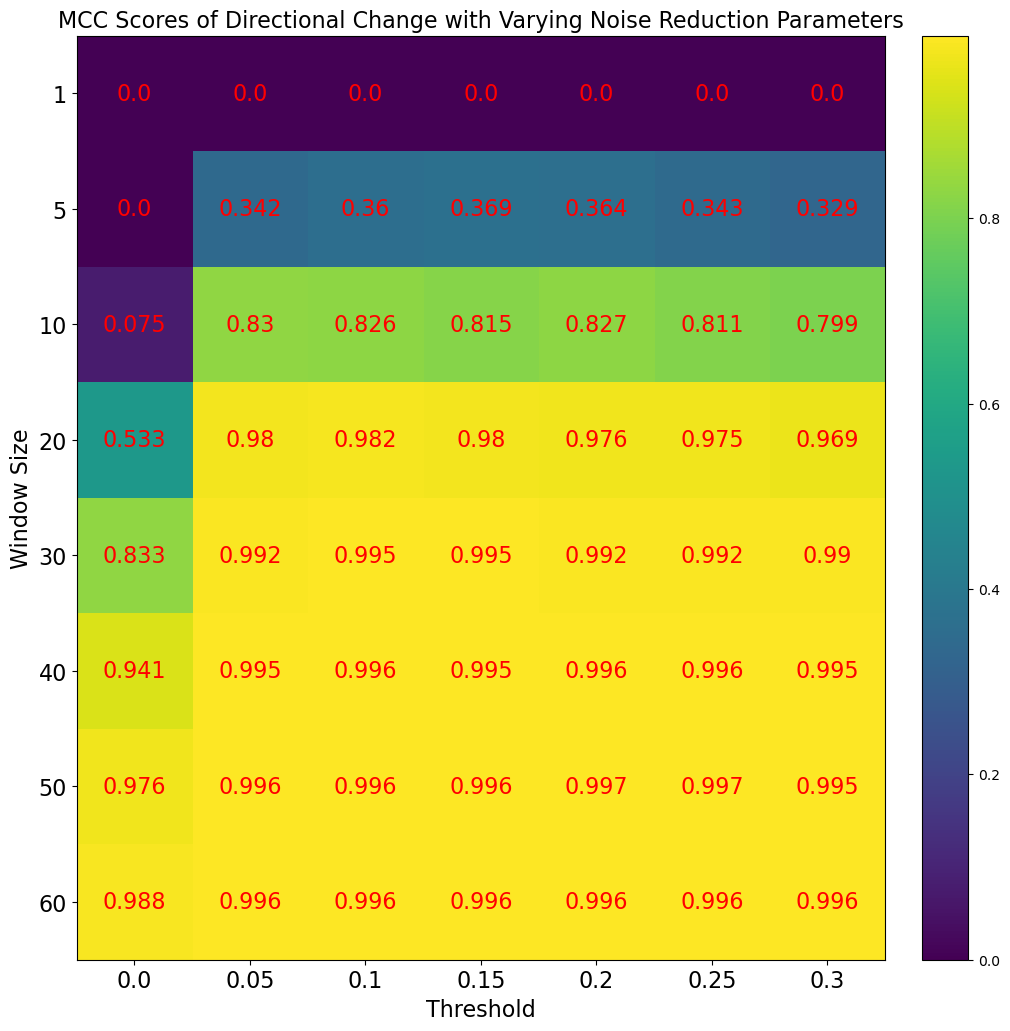

In [74]:
nr_matrix = [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
             [0.0, 0.342, 0.36, 0.369, 0.364, 0.343, 0.329],
             [0.075, 0.83, 0.826, 0.815, 0.827, 0.811, 0.799],
             [0.533, 0.98, 0.982, 0.98, 0.976, 0.975, 0.969],
             [0.833, 0.992, 0.995, 0.995, 0.992, 0.992, 0.99],
             [0.941, 0.995, 0.996, 0.995, 0.996, 0.996, 0.995],
             [0.976, 0.996, 0.996, 0.996, 0.997, 0.997, 0.995],
             [0.988, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996]]

plt.imshow(nr_matrix)

for i in range(len(nr_matrix)):
    for j in range(len(nr_matrix[i])):
        plt.text(j, i, round(nr_matrix[i][j], 3), ha='center', va='center', color="red", size=16)

plt.xlabel("Threshold", size=16)
plt.ylabel("Window Size", size=16)
plt.title("MCC Scores of Directional Change with Varying Noise Reduction Parameters", size=16)

threshold_ticks = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
window_ticks = [1, 5, 10, 20, 30, 40, 50, 60]

plt.xticks(list(range(len(threshold_ticks))), threshold_ticks, size=16)
plt.yticks(list(range(len(window_ticks))), window_ticks, size=16)

plt.colorbar(fraction=0.05, pad=0.04)
plt.gcf().set_size_inches(12, 12)

plt.savefig(path.join(cd, "final_report_graphs", "noise_reduction.png"), dpi=300)

plt.show()

## Boba + Koi + Bandung

In [40]:
train_data = {}
test_data = {}
train_labels = {}
test_labels = {}

process = lambda x : mf.changes_in_changes(mf.vel(x), 10, 0.1)

for name in names_all:
    pro_data, pro_labels = mc.process_data(pose_data_all[name], labels_all[name], process)
    train_data[name], test_data_dict, train_labels[name], test_labels_dict = mc.prep_train_test_data(pro_data, pro_labels, names_all[name])

    test_data[name] = np.concatenate(list(test_data_dict.values()))
    test_labels[name] = np.concatenate(list(test_labels_dict.values()))


In [42]:
results = {}

train_combos = ["koi", "boba", "bandung", ("koi", "boba"), ("bandung", "boba"), ("koi", "bandung"), ("koi", "boba", "bandung")]

clf = RandomForestClassifier(class_weight="balanced")

for train_combo in train_combos:
    results[train_combo] = {}

    if type(train_combo) is tuple:
        clf.fit(*merge_data(train_data, train_labels, train_combo))
    else:
        clf.fit(train_data[train_combo], train_labels[train_combo])

    for test_name in names_all:
        results[train_combo][test_name] = mc.test_classify(clf, test_data[test_name], test_labels[test_name])

/Users/Russell/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/Russell/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/Russell/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/Rus

In [43]:
mccs = []
train_only = ["koi", "boba", "bandung"]

for train_combo in results:
    row = []
    for test_name in train_only:
        row.append(results[train_combo][test_name]["mcc"])
    mccs.append(row)

accs = []
test_only_names = ["horlicks", "briyani", "tutukueh"]

for train_combo in results:
    row = []
    for test_name in test_only_names:
        row.append(results[train_combo][test_name]["accuracy"])
    accs.append(row)

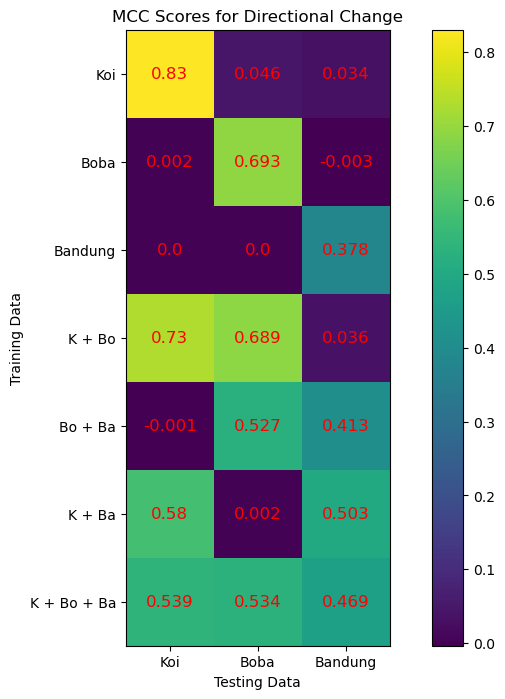

In [73]:
def str_process(name):
    if type(name) is tuple:
        first = True
        for n in name:
            if first:
                result = n.capitalize()
                first = False
            else:
                result += " + " + n.capitalize()
        return result
    return name.capitalize()

plt.imshow(mccs, cmap='viridis', interpolation='nearest')

for i in range(len(mccs)):
    for j in range(len(mccs[i])):
        plt.text(j, i, round(mccs[i][j], 3), ha='center', va='center', color="red", size=12)

plt.xlabel("Testing Data")
plt.ylabel("Training Data")
plt.title("MCC Scores for Directional Change")

y_labels = ["Koi", "Boba", "Bandung", "K + Bo", "Bo + Ba", "K + Ba", "K + Bo + Ba"]

plt.xticks(list(range(len(train_only))), [str_process(s) for s in train_only])
plt.yticks(list(range(len(train_combos))), y_labels)

plt.colorbar()
plt.gcf().set_size_inches(11, 8)

plt.savefig(path.join(cd, "final_report_graphs", "koi_boba_bandung.png"), dpi=300)
plt.show()

## Single Video Comparison Matrix

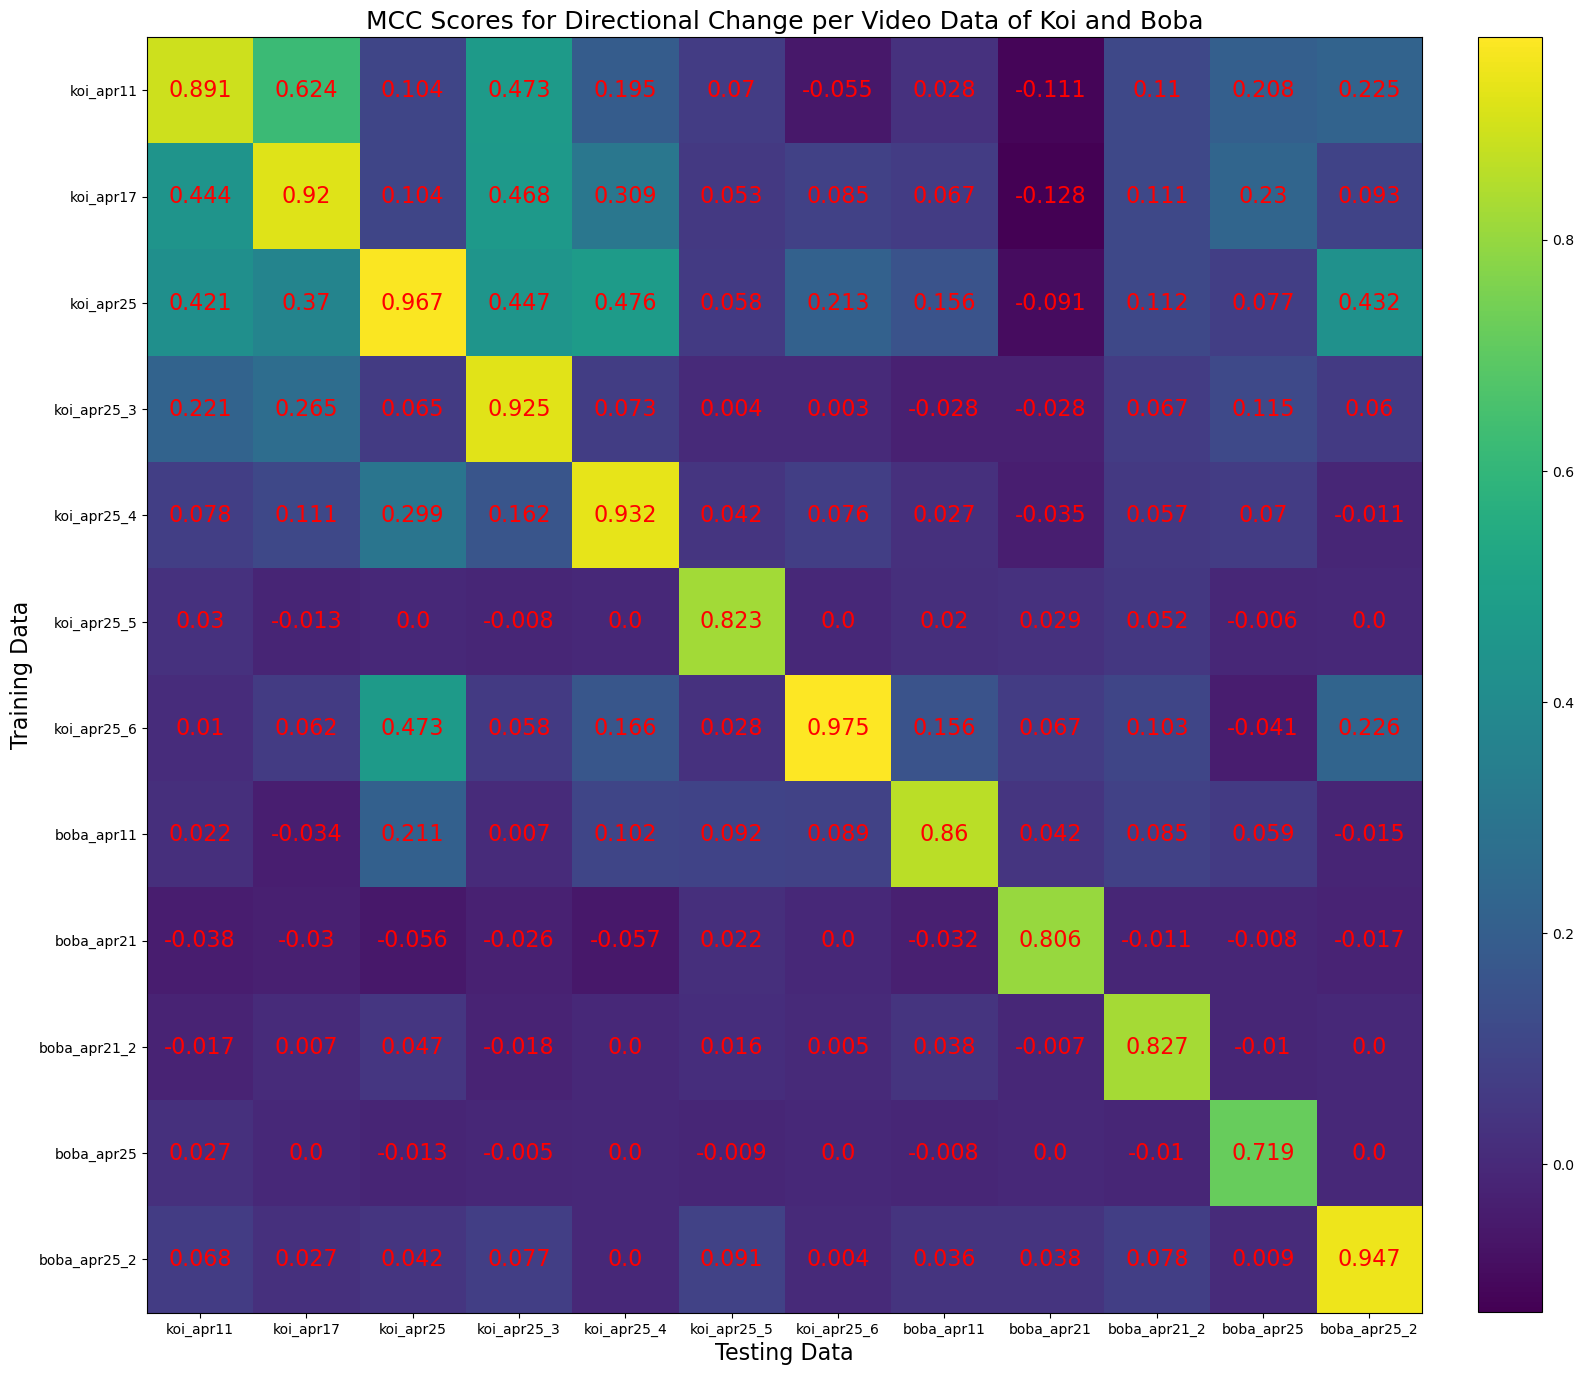

In [20]:
vidtovid = [[0.891, 0.624, 0.104, 0.473, 0.195, 0.07, -0.055, 0.028, -0.111, 0.11, 0.208, 0.225],
            [0.444, 0.92, 0.104, 0.468, 0.309, 0.053, 0.085, 0.067, -0.128, 0.111, 0.23, 0.093],
            [0.421, 0.37, 0.967, 0.447, 0.476, 0.058, 0.213, 0.156, -0.091, 0.112, 0.077, 0.432],
            [0.221, 0.265, 0.065, 0.925, 0.073, 0.004, 0.003, -0.028, -0.028, 0.067, 0.115, 0.06],
            [0.078, 0.111, 0.299, 0.162, 0.932, 0.042, 0.076, 0.027, -0.035, 0.057, 0.07, -0.011],
            [0.03, -0.013, 0.0, -0.008, 0.0, 0.823, 0.0, 0.02, 0.029, 0.052, -0.006, 0.0],
            [0.01, 0.062, 0.473, 0.058, 0.166, 0.028, 0.975, 0.156, 0.067, 0.103, -0.041, 0.226],
            [0.022, -0.034, 0.211, 0.007, 0.102, 0.092, 0.089, 0.86, 0.042, 0.085, 0.059, -0.015],
            [-0.038, -0.03, -0.056, -0.026, -0.057, 0.022, 0.0, -0.032, 0.806, -0.011, -0.008, -0.017],
            [-0.017, 0.007, 0.047, -0.018, 0.0, 0.016, 0.005, 0.038, -0.007, 0.827, -0.01, 0.0],
            [0.027, 0.0, -0.013, -0.005, 0.0, -0.009, 0.0, -0.008, 0.0, -0.01, 0.719, 0.0],
            [0.068, 0.027, 0.042, 0.077, 0.0, 0.091, 0.004, 0.036, 0.038, 0.078, 0.009, 0.947]]

vidtovid_names = names_koi + names_boba

plt.imshow(vidtovid)

plt.title("MCC Scores for Directional Change per Video Data of Koi and Boba", size=18)
plt.xlabel("Testing Data", size=16)
plt.ylabel("Training Data", size=16)
plt.xticks(range(len(vidtovid_names)), vidtovid_names)#, size=18)
plt.yticks(range(len(vidtovid_names)), vidtovid_names)#, size=18)

for r in range(len(vidtovid)):
    for c in range(len(vidtovid[r])):
        plt.text(c, r, round(vidtovid[r][c], 3), ha='center', va='center', color="red", size=16)

plt.colorbar(fraction=0.0457, pad=0.04)
plt.gcf().set_size_inches(18, 18)

plt.savefig(path.join(cd, "final_report_graphs", "video_to_video.png"), dpi=300)
plt.show()


## THE ULTIMATE TREMOR DETECTOR (Seen Videos)

In [51]:
ultimate_detector = RandomForestClassifier(class_weight="balanced")
ultimate_training_data = ("koi", "boba")

process = lambda x : mf.changes_in_changes(mf.vel(x), 10, 0.1)

In [52]:
ultimate_results = {}
ultimate_tremors = {}

for name in names_all:
    ultimate_results[name] = []
    ultimate_tremors[name] = []

In [53]:
repeats = 35

for i in range(repeats):
    train_data = {}
    test_data = {}
    train_labels = {}
    test_labels = {}

    for name in names_all:
        pro_data, pro_labels = mc.process_data(pose_data_all[name], labels_all[name], process)
        train_data[name], test_data_dict, train_labels[name], test_labels_dict = mc.prep_train_test_data(pro_data, pro_labels, names_all[name])

        test_data[name] = np.concatenate(list(test_data_dict.values()))
        test_labels[name] = np.concatenate(list(test_labels_dict.values()))

    ultimate_detector.fit(*merge_data(train_data, train_labels, ultimate_training_data))

    for test_name in names_all:
        this_res = mc.test_classify(ultimate_detector, test_data[test_name], test_labels[test_name])
        ultimate_results[test_name].append(this_res)
        ultimate_tremors[test_name].append(100 * (np.count_nonzero(this_res["predictions"]) / len(this_res["predictions"])))
    
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34


In [54]:
ultimate_results

{'koi': [{'predictions': array([0, 0, 0, ..., 0, 0, 0]),
   'mcc': 0.7232183324110466,
   'f1': 0.7282992237120677,
   'accuracy': 0.9243094465742652},
  {'predictions': array([0, 0, 0, ..., 0, 0, 1]),
   'mcc': 0.7276793003926048,
   'f1': 0.7320356558122614,
   'accuracy': 0.9276024771453848},
  {'predictions': array([0, 0, 0, ..., 0, 0, 1]),
   'mcc': 0.7346992131992232,
   'f1': 0.7412095639943742,
   'accuracy': 0.9276516268554016},
  {'predictions': array([0, 1, 0, ..., 0, 0, 0]),
   'mcc': 0.7243535972618734,
   'f1': 0.7282491944146079,
   'accuracy': 0.9253907401946329},
  {'predictions': array([0, 0, 0, ..., 0, 0, 1]),
   'mcc': 0.7178980862513376,
   'f1': 0.7218423893486866,
   'accuracy': 0.924014548314165},
  {'predictions': array([1, 0, 1, ..., 0, 0, 0]),
   'mcc': 0.7317395203011133,
   'f1': 0.7371622830560028,
   'accuracy': 0.9277990759854516},
  {'predictions': array([0, 0, 0, ..., 0, 0, 0]),
   'mcc': 0.7039298663545825,
   'f1': 0.706284891049883,
   'accuracy': 0

In [55]:
ultimate_tremors

{'koi': [10.18873488646417,
  9.933156394377274,
  10.40990858153937,
  10.011795930404011,
  9.913496510370589,
  10.169075002457486,
  9.69723778629706,
  9.87417674235722,
  10.060945640420721,
  10.1494151184508,
  10.173989973459156,
  10.208394770470854,
  9.859431829352207,
  10.370588813526,
  9.982306104393984,
  10.134670205445788,
  10.065860611422393,
  9.711982699302075,
  9.766047380320456,
  9.942986336380615,
  10.301779219502604,
  9.869261771355548,
  10.252629509485894,
  10.173989973459156,
  9.849601887348864,
  10.021625872407352,
  10.001965988400668,
  10.355843900520986,
  9.869261771355548,
  9.662832989285363,
  9.780792293325469,
  10.23296962547921,
  10.105180379435762,
  9.367934729185098,
  10.119925292440774],
 'boba': [5.830232146021619,
  6.397306397306397,
  6.025163919900762,
  5.806604052218088,
  5.753440841160139,
  6.066513084056944,
  5.806604052218088,
  5.948372615039282,
  5.81251107566897,
  6.485911749069643,
  5.7947900053163215,
  5.8597

In [66]:
avg_ult = {}
std_ult = {}

for name in names_all:
    avg_ult[name] = np.mean(ultimate_tremors[name])
    std_ult[name] = np.std(ultimate_tremors[name])

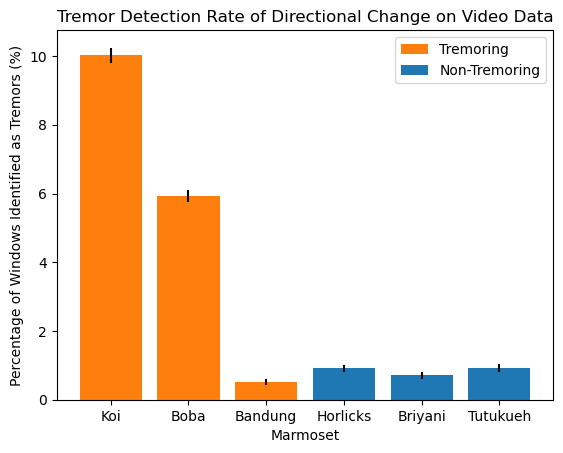

In [67]:
bar_heights = list(avg_ult.values())
x_ticks = [key.capitalize() for key in avg_ult.keys()]
y_err = list(std_ult.values())
plt.bar(x_ticks[:3], bar_heights[:3], color="tab:orange", label="Tremoring", yerr=y_err[:3])
plt.bar(x_ticks[3:], bar_heights[3:], color="tab:blue", label="Non-Tremoring", yerr=y_err[3:])
plt.xlabel("Marmoset")
plt.ylabel("Percentage of Windows Identified as Tremors (%)")
plt.title("Tremor Detection Rate of Directional Change on Video Data")
plt.legend()
plt.savefig(path.join(cd, "final_report_graphs", "tremor_detection_seen.png"), dpi=300)
plt.show()

In [59]:
avg_ult

{'koi': 10.016851329148587,
 'boba': 5.924744521235748,
 'bandung': 0.5264014054722321,
 'horlicks': 0.9099870173582728,
 'briyani': 0.7062679809460926,
 'tutukueh': 0.929809659396796}

In [60]:
var_ult

{'koi': 0.05064189898721683,
 'boba': 0.03444629659585205,
 'bandung': 0.0070797754723979,
 'horlicks': 0.012329046213956375,
 'briyani': 0.010012963378741439,
 'tutukueh': 0.015242715509949052}

## THE ULTIMATE 2 (Tested on Unseen Videos)

In [7]:
ultimate_detector2 = RandomForestClassifier()
ultimate_training_data2 = ("koi", "boba")

train_data_u2 = {}
test_data_u2 = {}
train_labels_u2 = {}
test_labels_u2 = {}

process = lambda x : mf.changes_in_changes(mf.vel(x), 10, 0.1)

for name in names_all:
    if name == "koi" or name == "boba":
        continue

    pro_data, pro_labels = mc.process_data(pose_data_all[name], labels_all[name], process)
    train_data_u2[name], test_data_dict, train_labels_u2[name], test_labels_dict = mc.prep_train_test_data(pro_data, pro_labels, names_all[name])

    test_data_u2[name] = np.concatenate(list(test_data_dict.values()))
    test_labels_u2[name] = np.concatenate(list(test_labels_dict.values()))

pro_koi, pro_labels_koi = mc.process_data(pose_data_all["koi"], labels_all["koi"], process)
train_data_u2["koi"], _, train_labels_u2["koi"], _ = mc.prep_train_test_data(pro_koi, pro_labels_koi, ["koi_apr11", "koi_apr25", "koi_apr25_3", "koi_apr25_4", "koi_apr25_5", "koi_apr25_6"])

test_data_u2["koi"] = pro_koi["koi_apr17"]
test_labels_u2["koi"] = pro_labels_koi["koi_apr17"]

pro_boba, pro_labels_boba = mc.process_data(pose_data_all["boba"], labels_all["boba"], process)
train_data_u2["boba"], _, train_labels_u2["boba"], _ = mc.prep_train_test_data(pro_boba, pro_labels_boba, ["boba_apr11", "boba_apr21_2", "boba_apr25", "boba_apr25_2"])

test_data_u2["boba"] = pro_boba["boba_apr21"]
test_labels_u2["boba"] = pro_labels_boba["boba_apr21"]

ultimate_detector2.fit(*merge_data(train_data_u2, train_labels_u2, ultimate_training_data2))

RandomForestClassifier()

In [8]:
ul2mate_results = {}
ul2mate_tremors = {}

for test_name in names_all:
    preds = ultimate_detector2.predict(test_data_u2[test_name])
    ul2mate_results[test_name] = preds
    ul2mate_tremors[test_name] = 100 * np.count_nonzero(preds) / preds.shape[0]

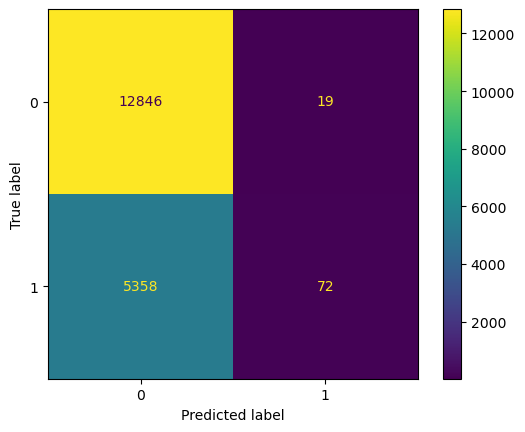

In [9]:
ConfusionMatrixDisplay.from_predictions(test_labels_u2["koi"], ul2mate_results["koi"])

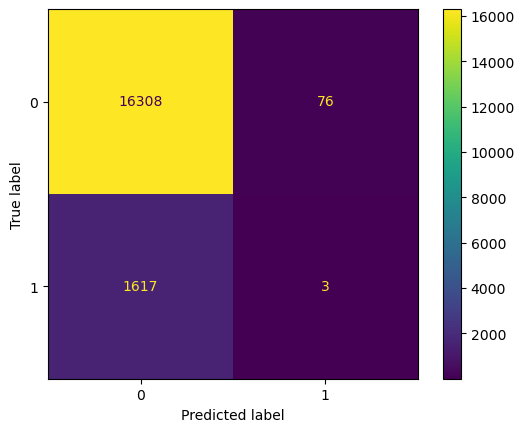

In [10]:
ConfusionMatrixDisplay.from_predictions(test_labels_u2["boba"], ul2mate_results["boba"])

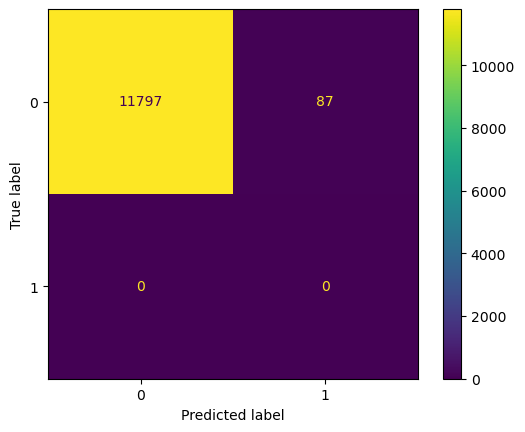

In [11]:
ConfusionMatrixDisplay.from_predictions(test_labels_u2["horlicks"], ul2mate_results["horlicks"])

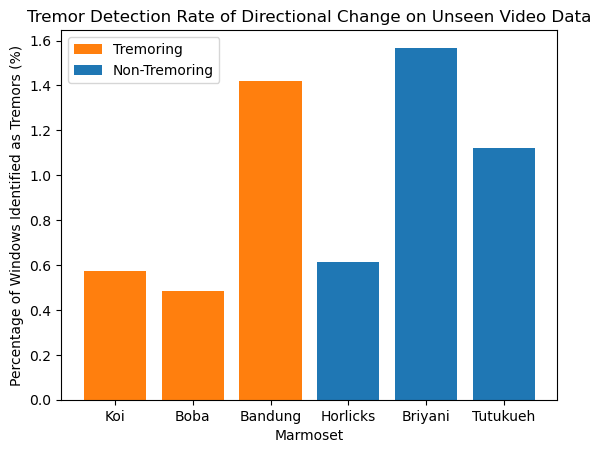

In [ ]:
bar_heights = list(ul2mate_tremors.values())
x_ticks = [key.capitalize() for key in ul2mate_tremors.keys()]
plt.bar(x_ticks[:3], bar_heights[:3], color="tab:orange", label="Tremoring")
plt.bar(x_ticks[3:], bar_heights[3:], color="tab:blue", label="Non-Tremoring")
plt.xlabel("Marmoset")
plt.ylabel("Percentage of Windows Identified as Tremors (%)")
plt.title("Tremor Detection Rate of Directional Change on Unseen Video Data")
plt.legend()
plt.savefig(path.join(cd, "final_report_graphs", "tremor_detection_rate.png"), dpi=300)
plt.show()

## The ULTIMATE TREMOR IDENTIFIER (Unseen videos, all 35 possible combinations)

In [9]:
ult3 = RandomForestClassifier(class_weight="balanced")

pro_data3 = {}
pro_labels3 = {}

test_base3 = {}

process = lambda x : mf.changes_in_changes(mf.vel(x), 10, 0.1)

for name in names_all:
    pro_data3[name], pro_labels3[name] = mc.process_data(pose_data_all[name], labels_all[name], process)
    if name != "koi" and name != "boba":
        _, test_data, _, _ = mc.prep_train_test_data(pro_data3[name], pro_labels3[name], names_all[name])
        test_base3[name] = np.concatenate(list(test_data.values()))

In [11]:
preds_ult3 = {}
percent_ult3 = {}

for name in names_all:
    preds_ult3[name] = []
    percent_ult3[name] = []

In [12]:
for i in range(len(names_koi)):
    excluded_koi = names_koi[i]
    included_koi = names_koi[:i] + names_koi[i+1:]
    
    train_koi, _, train_koi_labels, _ = mc.prep_train_test_data(pro_data3["koi"], pro_labels3["koi"], included_koi)
    
    test_base3["koi"] = pro_data3["koi"][excluded_koi]

    for j in range(len(names_boba)):
        excluded_boba = names_boba[j]
        included_boba = names_boba[:j] + names_boba[j+1:]

        train_boba = []
        train_boba_labels = []

        for ib in included_boba:
            train_boba.append(pro_data3["boba"][ib])
            train_boba_labels.append(pro_labels3["boba"][ib])
    
        test_base3["boba"] = pro_data3["boba"][excluded_boba]

        train_total3 = np.concatenate((train_koi, train_boba), axis=0)
        train_labels_total3 = np.concatenate((train_koi_labels, train_boba_labels), axis=0)

        ult3.fit(train_total3, train_labels_total3)

        for name in names_all:
            pred = ult3.predict(test_base3[name])
            percent = 100 * np.count_nonzero(pred) / pred.shape[0]
            preds_ult3[name].append(pred)
            percent_ult3[name].append(percent)

In [16]:
for name in percent_ult3:
    print(name)
    print(percent_ult3[name])
    print(len(percent_ult3[name]))

koi
[0.2166446499339498, 0.9986789960369881, 0.35402906208718626, 0.35402906208718626, 0.2166446499339498, 0.0874555889587319, 0.448209893413501, 0.10385351188849412, 0.14758130636786007, 0.09838753757857338, 0.09292316721279405, 0.09781386022399374, 0.09292316721279405, 0.06357900914559593, 0.10270455323519342, 0.5808637659334158, 1.231646318506965, 0.8444038078846878, 0.8605389124939493, 0.7691066530414672, 0.3839590443686007, 0.7252559726962458, 0.46928327645051193, 0.7252559726962458, 0.5972696245733788, 1.3943190918083754, 3.551745254133497, 1.7052145649818644, 2.331716048801168, 1.2106081303876772, 0.5829358770535241, 1.7488076311605723, 0.9538950715421304, 1.5368309485956544, 1.2718600953895072]
35
boba
[0.2590795609779076, 0.9608975783159298, 0.20580263025800621, 0.3438692354797682, 0.3056665882906184, 0.14131612416976777, 0.24439013552543878, 0.13552856138941874, 0.1366055866974422, 0.25864095932283093, 0.739554383155118, 1.805154410131082, 0.5019576347756249, 0.80079137029535

In [61]:
mean_ult3 = []
stds_ult3 = []
names = []

for name in percent_ult3:
    l = percent_ult3[name]
    mean_ult3.append(np.mean(l))
    stds_ult3.append(np.std(l))

    names.append(name.capitalize())

In [28]:
mean_ult3

[0.7700278307947495,
 0.7987917946995357,
 0.9129062693171096,
 1.5252199836514881,
 1.1281422440220723,
 1.4748704942156075]

In [62]:
stds_ult3

[0.7409202966990193,
 0.7183779247745985,
 0.7348680961590162,
 1.1691050005404995,
 0.6539149851511873,
 1.117056176539605]

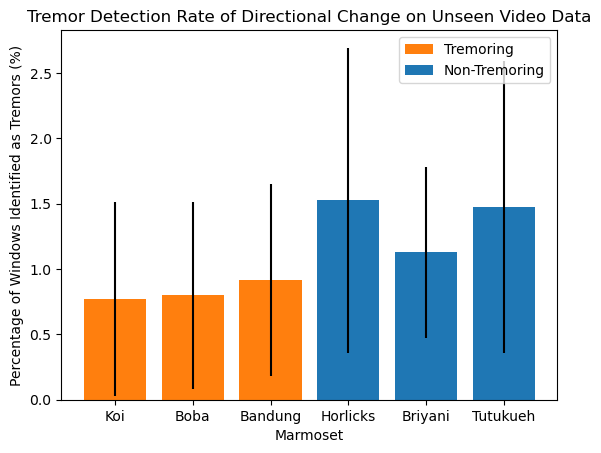

In [65]:
plt.bar(names[:3], mean_ult3[:3], color="tab:orange", label="Tremoring", yerr=stds_ult3[:3])
plt.bar(names[3:], mean_ult3[3:], color="tab:blue", label="Non-Tremoring", yerr=stds_ult3[3:])

plt.xlabel("Marmoset")
plt.ylabel("Percentage of Windows Identified as Tremors (%)")
plt.title("Tremor Detection Rate of Directional Change on Unseen Video Data")

plt.legend()
plt.savefig(path.join(cd, "final_report_graphs", "tremor_detection_rate_unseen_avg.png"), dpi=300)
plt.show()

## Confusion Matrices

In [19]:
process = lambda x : mf.changes_in_changes(mf.vel(x), 10, 0.1)

cfm_koi_data, cfm_koi_labels = mc.process_data(pose_data_koi, labels_koi, process)

train_koi, test_koi, train_koi_labels, test_koi_labels = mc.prep_train_test_data(cfm_koi_data, cfm_koi_labels, names_koi)

test_koi = np.concatenate(list(test_koi.values()))
test_koi_labels = np.concatenate(list(test_koi_labels.values()))

cfm_boba_data, cfm_boba_labels = mc.process_data(pose_data_boba, labels_boba, process)

train_boba, test_boba, train_boba_labels, test_boba_labels = mc.prep_train_test_data(cfm_boba_data, cfm_boba_labels, names_boba)

test_boba = np.concatenate(list(test_boba.values()))
test_boba_labels = np.concatenate(list(test_boba_labels.values()))

In [20]:
clf = RandomForestClassifier(class_weight="balanced")
clf.fit(train_koi, train_koi_labels)

results_koi = mc.test_classify(clf, test_koi, test_koi_labels)
results_boba = mc.test_classify(clf, test_boba, test_boba_labels)

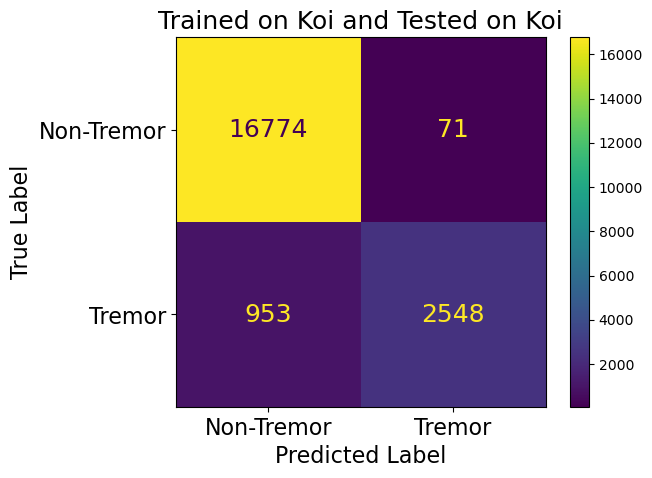

In [43]:
dl = ["Non-Tremor", "Tremor"]
cmd_koi = ConfusionMatrixDisplay.from_predictions(test_koi_labels, results_koi["predictions"], display_labels=dl)

for label in cmd_koi.text_.ravel():
    label.set_fontsize(18)

cmd_koi.ax_.set_title("Trained on Koi and Tested on Koi", fontsize=18)
cmd_koi.ax_.set_xticklabels(dl, fontsize=16)
cmd_koi.ax_.set_yticklabels(dl, fontsize=16)
cmd_koi.ax_.set_xlabel("Predicted Label", fontsize=16)
cmd_koi.ax_.set_ylabel("True Label", fontsize=16)

cmd_koi.figure_.savefig(path.join(cd, "final_report_graphs", "cfmtx_koi_on_koi.png"), dpi=300, bbox_inches="tight")

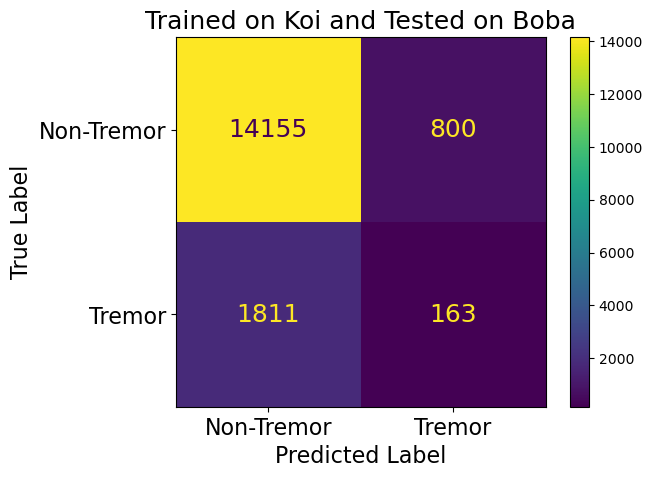

In [44]:
dl = ["Non-Tremor", "Tremor"]
cmd_boba = ConfusionMatrixDisplay.from_predictions(test_boba_labels, results_boba["predictions"], display_labels=dl)

for label in cmd_boba.text_.ravel():
    label.set_fontsize(18)

cmd_boba.ax_.set_title("Trained on Koi and Tested on Boba", fontsize=18)
cmd_boba.ax_.set_xticklabels(dl, fontsize=16)
cmd_boba.ax_.set_yticklabels(dl, fontsize=16)
cmd_boba.ax_.set_xlabel("Predicted Label", fontsize=16)
cmd_boba.ax_.set_ylabel("True Label", fontsize=16)

cmd_boba.figure_.savefig(path.join(cd, "final_report_graphs", "cfmtx_koi_on_boba.png"), dpi=300, bbox_inches="tight")